## 홍릉강소특구 신약 개발을 위한 분자 데이터셋 다루기 실습 (2022.10.13 이화민)

# 분자 데이터셋 DeepChem
- DeepChem의 Dataset 클래스는 NumPy, Pandas, TensorFlow, PyTorch와 쉽게 호환되도록 만든 데이터셋 구조체

In [1]:
# DeepChem 설치(RDKit도 함께 설치됨)
!pip install DeepChem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 5.3 MB/s 
     |████████████████████████████████| 36.8 MB 1.4 MB/s 


In [2]:
from rdkit import Chem 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# SMILE로 분자 표기/표현
- SMILES 표기법은 Simplified Molecular Input Line Entry System의 준말로, 분자 구조를 string 형태로 표현
- NLP에서 사용하는 다양한 머신러닝/딥러닝 알고리즘들을 분자 구조에도 적용할 수 있게 해주는 표기법이기도 함
- SMILES 표기법을 구성하는 분자 구조의 요소는 크게 원자(atom), 결합(bond), 고리(ring), 방향족(aromaticity), 가지(branch) 5개로 구성

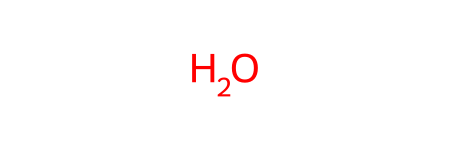

In [5]:
# 물
m = Chem.MolFromSmiles('O')
m

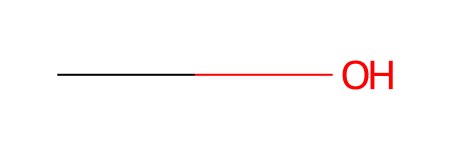

In [7]:
# 메탄올
m = Chem.MolFromSmiles('CO')
m

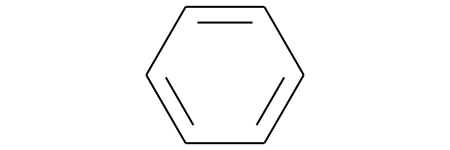

In [8]:
# 벤젠
m = Chem.MolFromSmiles('c1ccccc1')
m

In [17]:
# SMILES 표기법은 동일 분자를 다양하게 표현하기도 함
print(Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1')))

c1ccncc1
c1ccncc1
c1ccncc1


# mol 파일 읽기

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   6408      0 --:--:-- --:--:-- --:--:--  6408


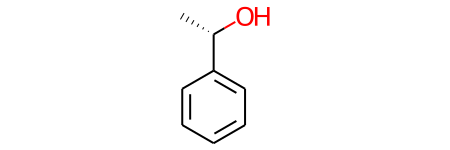

In [9]:
!curl https://raw.githubusercontent.com/rdkit/rdkit-orig/master/Docs/Book/data/chiral.mol -o chiral.mol
m = Chem.MolFromMolFile('chiral.mol')
m

In [10]:
# SMILE로 변환하기
Chem.MolToSmiles(m)

'C[C@H](O)c1ccccc1'

# mol 파일의 세부 정보 : https://en.wikipedia.org/wiki/Chemical_table_file
- SDF : https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics_OLCC_(2019)/02%3A_Representing_Small_Molecules_on_Computers/2.05%3A_Structural_Data_Files

In [11]:
# mol 파일 보기
!cat chiral.mol


  Marvin  08160807402D          

  9  9  0  0  1  0            999 V2000
    0.0000    2.4750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145    2.0625    0.0000 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.4289    2.4750    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145    1.2375    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145   -0.4125    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  6  0  0  0
  2  4  1  0  0  0  0
  4  5  4  0  0  0  0
  5  6  4  0  0  0  0
  6  7  4  0  0  0  0
  7  8  4  0  0  0  0
  8  9  4  0  0  0  0
  4  9  4  0  0  0  0
M  END


In [12]:
print(m.GetNumAtoms(), m.GetNumBonds())

9 9


#SDF (Structure Data File) 파일 읽기
다수의 mol 정보를 저장하는 파일 형식

In [13]:
!curl https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/5ht3ligs.sdf -o a.sdf
!head -40 a.sdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9578  100  9578    0     0  65602      0 --:--:-- --:--:-- --:--:-- 66055
mol-295
XXCombChem04050707333D                 0.00000

 22 24  0  0  1  0  0  0  0  0999 V2000
    2.3200    0.0800   -0.1000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8400   -1.2200    0.1200 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6800    0.0800    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7400    1.2800   -0.5600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9400   -1.9200    0.6000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5400   -1.7400   -0.0800 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0200   -1.1400    0.6600 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.4600    1.2600    0.1600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5200    2.4600   -0.6600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3800   -1.0400   -0.5000 O   0 

In [15]:
suppl = Chem.SDMolSupplier('a.sdf')
for mol in suppl:
  print(mol.GetNumAtoms(), mol.GetNumBonds())

20 22
24 26
24 27
26 29


In [18]:
m2 = Chem.MolFromSmiles('C1CCC1')
print(Chem.MolToMolBlock(m2),file=open('foo.mol','w+'))

In [19]:
!cat foo.mol


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



6
8
6


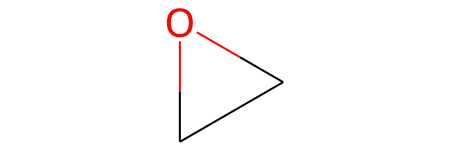

In [23]:
# mol 객체 다양하게 사용하기
m = Chem.MolFromSmiles('C1OC1')
for atom in m.GetAtoms():
  print(atom.GetAtomicNum())

m

In [24]:
print(m.GetBonds()[0].GetBondType())
print(m.GetAtomWithIdx(0).GetSymbol())
print(m.GetAtomWithIdx(0).GetExplicitValence())

SINGLE
C
2


# 분자 이미지 그리기

In [25]:
!curl -o cdk2.sdf https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/cdk2.sdf

with Chem.SDMolSupplier('cdk2.sdf') as suppl:
  ms = [x for x in suppl if x is not None]

print(len(ms), 'mols')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  156k  100  156k    0     0   762k      0 --:--:-- --:--:-- --:--:--  762k
47 mols


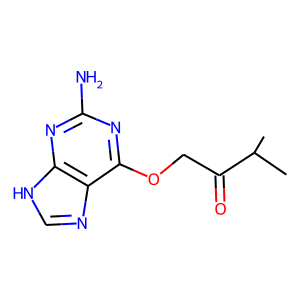

In [26]:
img1 = Draw.MolToImage(ms[0],subImgSize=(300,300),returnPNG=False)
img1

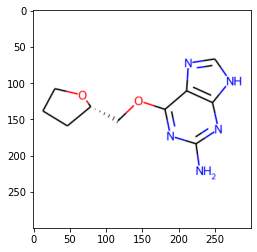

In [27]:
# 이미지 파일로 저장하기
Draw.MolToFile(ms[1],'cdk2_mol1.o.png')    
plt.imshow(mpimg.imread('cdk2_mol1.o.png'))

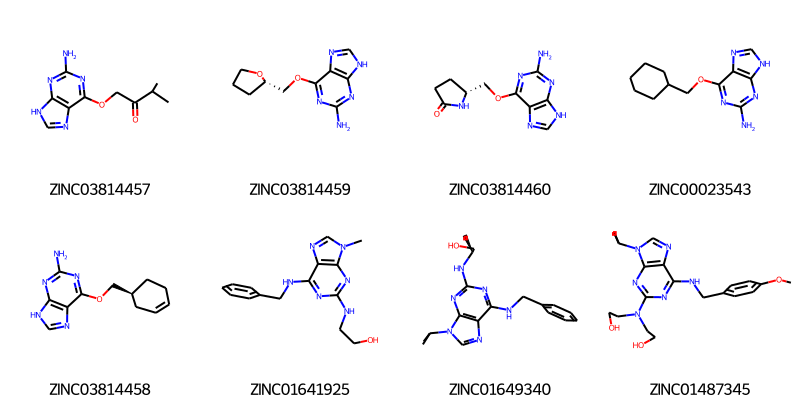

In [32]:
# 그리드 형태로 여러 분자 이미지 그리기
img=Draw.MolsToGridImage(ms[:8],molsPerRow=4,
    subImgSize=(200,200),returnPNG=False,
    legends=[x.GetProp("_Name") for x in ms[:8]])    
img